<a href="https://colab.research.google.com/github/Chaitanyachafle/Portfolio/blob/main/Yulu_bike_Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Problem**
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

How well those variables describe the electric cycle demands?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest as ztest

In [3]:
df = pd.read_csv("bike_sharing.csv")

In [7]:
df.shape

(10886, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [12]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
##Checking for any null value
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

=========================================
**Univariate Analysis** ======================================

In [15]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


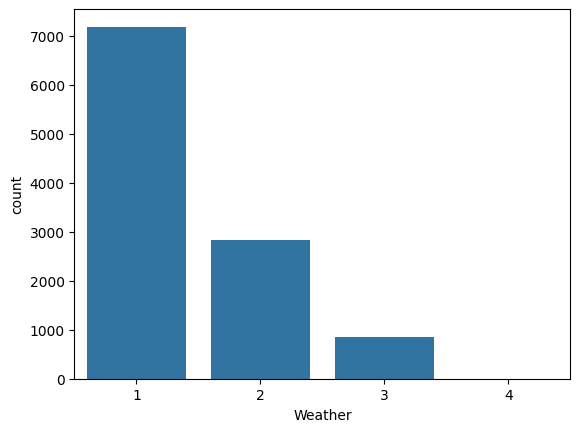

In [49]:
sns.countplot(x=df["weather"])
plt.xlabel("Weather")
plt.show()

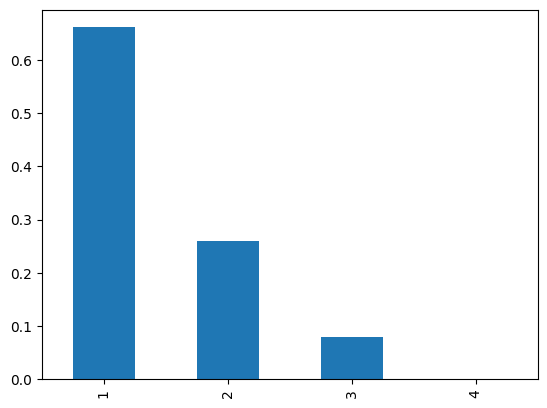

In [44]:
df['weather'].value_counts(normalize=True).round(3).plot(kind = "bar")
plt.show()

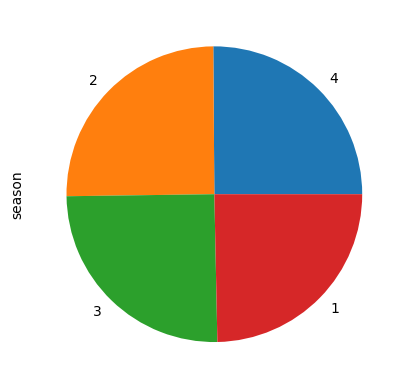

In [42]:
df["season"].value_counts().plot(kind="pie")
plt.show()

**Observation of Univariate Analysis**


*   weather category 1 has most number of values around 70 percent values
   
1.   Clear, Few clouds, partly cloudy, partly cloudy

*   season values are nearly equal for all seasons





# ++++++++++++++++++**Bivariate Analysis**++++++++++++++++++++++++

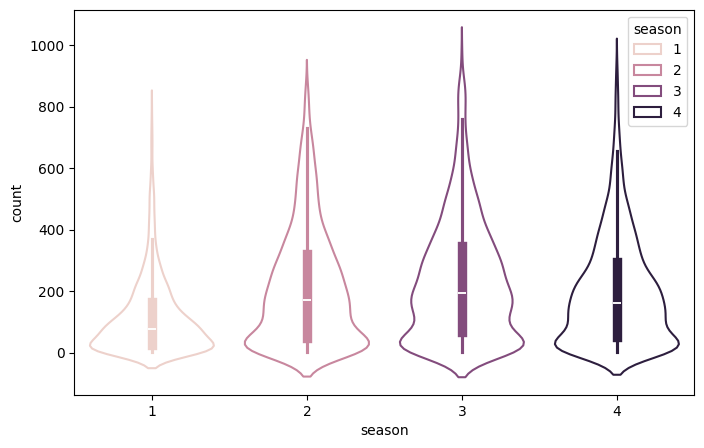

In [58]:
plt.figure(figsize=(8,5))
sns.violinplot(x = 'season', y = 'count', data = df,hue='season',fill=False)
plt.show()

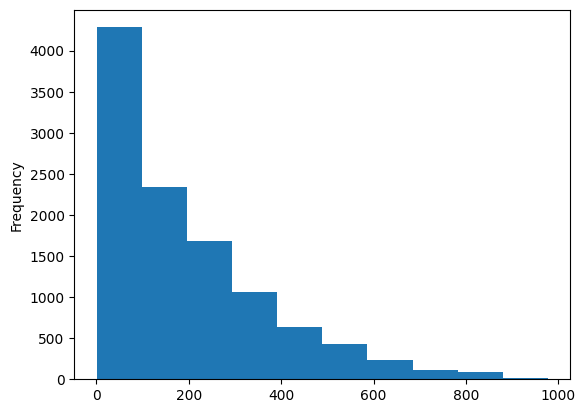

In [70]:
df["count"].plot(kind = "hist")
plt.show()

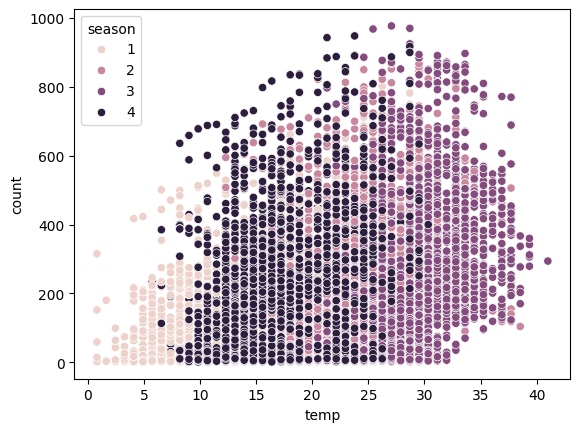

In [76]:
sns.scatterplot(data = df, x = "temp", y = "count", hue = "season")
plt.show()

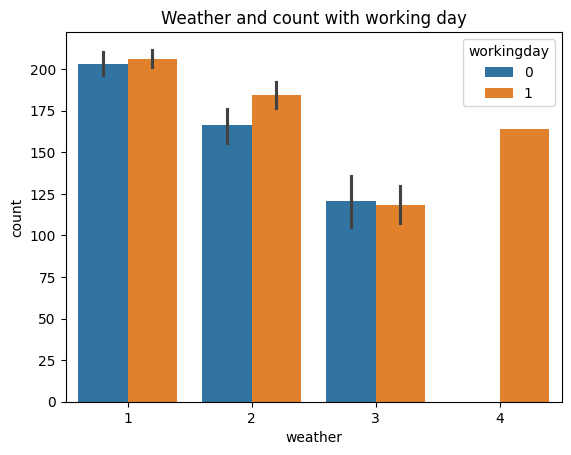

In [81]:
sns.barplot(x="weather", y="count",data=df, hue="workingday")
plt.title("Weather and count with working day")
plt.show()

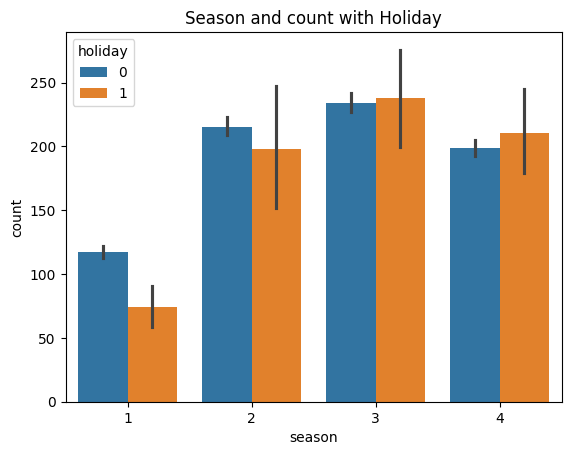

In [85]:
sns.barplot(x="season", y="count",data=df, hue="holiday")
plt.title("Season and count with Holiday")
plt.show()

<Axes: xlabel='casual', ylabel='count'>

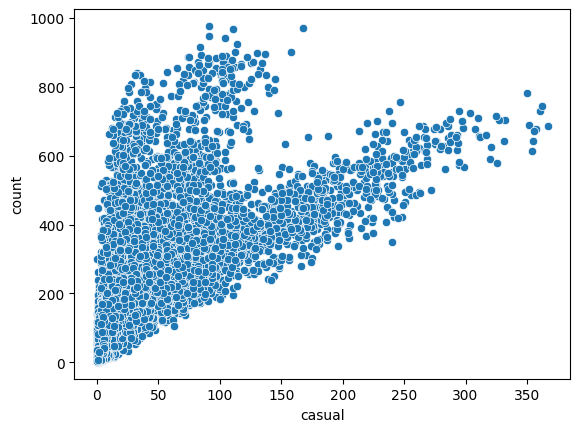

In [91]:
sns.scatterplot(x="casual", y="count",data=df)

**Observation**

1.   Weather day 1 has most bikes rented (1: Clear, Few clouds, partly cloudy, partly cloudy)
2.   Season Fall has most number of counts and spring has least
3. No users on holidays in Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather conditions
4. weather category 1 has equal users on holidays and workdays



# **Getting a bird eye view of some data**

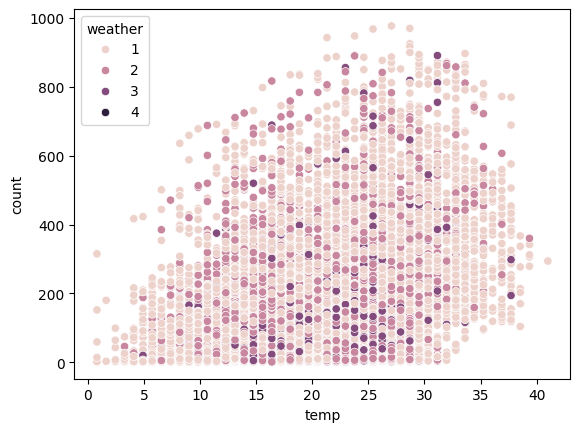

In [93]:
sns.scatterplot(data = df, x = "temp", y = "count", hue = "weather")
plt.show()

# * Objectve 1
## 2 sample Test
To determine whether holiday and working day has any effect on number of bikes rented

In [95]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [96]:
workinday_rent_count = df["count"].loc[df["workingday"] == 0]
holiday_rent_count = df["count"].loc[df["workingday"] == 1]

**Null Hypothesis**
Ho is working day and holiday has no effect on number of bikes rented

Ho = holiday and working day are same

i.e. Ho => number of bikes rented on holiday are same as number of bikes rented on working day

**Alternate Hypothesis**
Ha => number of bikes rented on holiday are not same as number of bikes rented on working day

using 2 sample test

Keeping full sample size as is as larger sample size assures us a near normal distribution

In [105]:
samp1=workinday_rent_count
samp2=holiday_rent_count
alpha=0.05

In [107]:
zscore,p_value= ztest(samp1,samp2,alternative='two-sided')
print(p_value)
if p_value < alpha:
  print("Reject Ho:there is no similarity in count of bikes rented in different weathers")
else:
  print("Failed to reject H0/Accept Ho:Working day and holiday has no effect on number of bikes rented ")

0.22642176970306893
Failed to reject H0/Accept Ho:Working day and holiday has no effect on number of bikes rented 


**Observation**
We accept number of bikes rented on holiday are same as number of bikes rented on working day, i.e null hypothesis

note: There is a risk in considering the values of this test as very correct as we have not taken the normal sample distribution for 2 sample test and not cross checked with assumptions of the test (Normality, Equal Variance).

# Objectve 2
## Chi-square
Test to check if Weather is dependent on the season

**Weather:**
1. Clear, Few clouds, partly cloudy, partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**season:**

1. spring
2. summer
3. fall
4. winter


**Hypothesis**

**Null Hypothesis** "Ho"

Weather and season are independent or No relation

**Alternate hypoothesi**s "Ha"

variables weather and season are dependent or significant relationship

Ho is variables are independent

Ha is variables are dependent

In [112]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [113]:
df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

# Contingency table

In [116]:
pd.crosstab(index=df['weather'],columns=df["season"],margins=True)

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


In [117]:
from scipy.stats import chi2_contingency

In [121]:
# defining the table
data = [[1759, 715, 211, 1], [1801, 708, 224, 0], [1930, 604, 199, 0], [1702, 807, 225, 0]]
stat, p, dof, expected = chi2_contingency(data)
print(p)
print(expected)

1.549925073686492e-07
[[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]


In [122]:
alpha = 0.05
p

if p < alpha:
    print("Reject Ho. Accept Ha")
else:
    print("Accept Ho,  fail to reject he null hypothesis")

Reject Ho. Accept Ha


**Observation**
We have Rejected null hypothesis and accepted Alternate hypothesis

Variables weather and season are **dependent** and will affect the each other values resulting changes in count in rented bikes

====================================================================================================================

* Objectve 3
1. ANNOVA to check if No. of cycles rented is similar or different in different weathers
To check
whether "Weather" has any effect on nu,ber of bikes rented

**Hypothesis**
**Null Hypothesis** "Ho" :-Bikes rented in all weather are similar

**Alternate hypothesis** "Ha":-Number of Bikes rented in all weather are different

In [123]:
## stats model library
from scipy.stats import f_oneway

Weather

1. Clear, Few clouds, partly cloudy, partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [124]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [125]:
cat_1 = df.loc[df['weather'] == 1]['count'].values
cat_2 = df.loc[df['weather'] == 2]['count'].values
cat_3 = df.loc[df['weather'] == 3]['count'].values
cat_4 = df.loc[df['weather'] == 4]['count'].values

# f_oneway(cat_1, cat_2, cat_3, cat_4)

In [137]:
statistic,p_value=f_oneway(cat_1, cat_2, cat_3, cat_4)
print(statistic)
print(p_value)

65.53024112793271
5.482069475935669e-42


In [138]:
alpha=0.05
if p_value < alpha:
   print("Reject Ho:- Number of Bikes rented in all weather are different")
else:
    print("Accept Ho:-Bikes rented in all weather are similar")

Reject Ho:- Number of Bikes rented in all weather are different


**Observation**

As we **reject the NUll Hypothesis**:
Means yulu need to have different policies for different weather conditions as these are not working. same policies for all weather won't work.
################################################################

2. **ANNOVA to check if No. of cycles rented is similar or different in different seasons**

To check
whether "seasons" has any effect on number of bikes rented

**Hypothesis**
Null Hypothesis "Ho" :-Bikes rented in all seasons are similar

**Alternate hypoothesis "Ha"**:-number of Bikes rented in all seasons are different

In [139]:
df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

season
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
Name: count, dtype: object

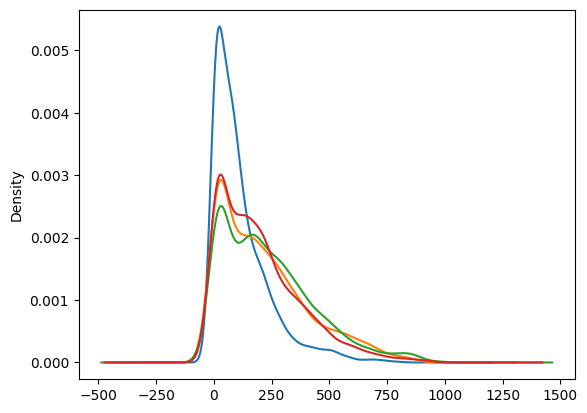

In [142]:
df.groupby('season')['count'].plot(kind='kde')

In [148]:
sea_cat_1=df.loc[df['season']==1]['count'].values
sea_cat_2=df.loc[df['season']==2]['count'].values
sea_cat_3=df.loc[df['season']==3]['count'].values
sea_cat_4=df.loc[df['season']==4]['count'].values

In [150]:
statistic,p_value=f_oneway(sea_cat_1, sea_cat_2, sea_cat_3, sea_cat_4)
print(statistic)
print(p_value)

236.94671081032106
6.164843386499654e-149


In [151]:
alpha=0.05
if p_value < alpha:
   print("Reject Ho:- Number of Bikes rented in all season are different")
else:
    print("Accept Ho:-Bikes rented in all season are similar")

Reject Ho:- Number of Bikes rented in all season are different


# Observation
As we reject the NUll Hypothesis :This means we need to have different policies for different seasons. same policies for al seasons won't work

# Insights and Recommendations
Insights

*   working day and holiday has no effect on number of bikes rented
Note: There is a risk in considering the values of this test as very correct as we have not taken the normal sample distribution for 2 sample test and not cross checked with assumptions of the test (Normality, Equal Variance).

Variables like weather and seasons are dependent variables

*   Variables like weather and seasons are **dependent** variables
*  Anova test on weather has given us insight of weather has effect on number of bikes rented, number of Bikes rented in all seasons are different.

*  Similarly results on season reflect the number of bikes rented in every seasion is different
################################

# **Recommendations**
Need different strategy for different seasons

*   Need different strategy for different seasons
*   As weather and seasons are dependent they affect the business so policies and business plans should cater different seasons and weather conditoins

*   A customer expercience should be worked on where it is specially curated according to weather and seasons which can lead to more users






